## 2.2 PyTorch第一步

PyTorch的简洁设计使得它入门很简单，在深入介绍PyTorch之前，本节将先介绍一些PyTorch的基础知识，使得读者能够对PyTorch有一个大致的了解，并能够用PyTorch搭建一个简单的神经网络。部分内容读者可能暂时不太理解，可先不予以深究，本书的第3章和第4章将会对此进行深入讲解。

本节内容参考了PyTorch官方教程[^1]并做了相应的增删修改，使得内容更贴合新版本的PyTorch接口，同时也更适合新手快速入门。另外本书需要读者先掌握基础的Numpy使用，其他相关知识推荐读者参考CS231n的教程[^2]。

[^1]: http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
[^2]: http://cs231n.github.io/python-numpy-tutorial/

### Tensor

Tensor是PyTorch中重要的数据结构，可认为是一个高维数组。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）以及更高维的数组。Tensor和Numpy的ndarrays类似，但Tensor可以使用GPU进行加速。Tensor的使用和Numpy及Matlab的接口十分相似，下面通过几个例子来看看Tensor的基本使用。

In [51]:
 from __future__ import print_function
import torch as t
import torch
t.__version__

'1.10.0+cu111'

In [ ]:
# 构建 5x3 矩阵，只是分配了空间，未初始化
x = t.Tensor(5, 3)

x = t.Tensor([[1,2],[3,4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# 使用[0,1]均匀分布随机初始化二维数组
x = t.rand(5, 3)  
x

tensor([[0.9971, 0.4956, 0.7326],
        [0.5040, 0.2773, 0.1133],
        [0.1560, 0.8798, 0.3876],
        [0.8097, 0.8484, 0.6488],
        [0.5509, 0.5815, 0.1071]])

In [ ]:
print(x.size()) # 查看x的形状
x.size()[1], x.size(1) # 查看列的个数, 两种写法等价

torch.Size([5, 3])


(3, 3)

`torch.Size` 是tuple对象的子类，因此它支持tuple的所有操作，如x.size()[0]

In [ ]:
y = t.rand(5, 3)
# 加法的第一种写法
x + y

tensor([[1.3989, 0.5617, 0.9267],
        [1.4302, 0.4502, 0.5107],
        [0.5054, 1.4337, 0.4496],
        [1.4012, 1.5774, 0.9716],
        [1.5367, 1.2256, 0.5118]])

In [ ]:
# 加法的第二种写法
t.add(x, y)

tensor([[1.3989, 0.5617, 0.9267],
        [1.4302, 0.4502, 0.5107],
        [0.5054, 1.4337, 0.4496],
        [1.4012, 1.5774, 0.9716],
        [1.5367, 1.2256, 0.5118]])

In [ ]:
# 加法的第三种写法：指定加法结果的输出目标为result
result = t.Tensor(5, 3) # 预先分配空间
t.add(x, y, out=result) # 输入到result
result

tensor([[1.3989, 0.5617, 0.9267],
        [1.4302, 0.4502, 0.5107],
        [0.5054, 1.4337, 0.4496],
        [1.4012, 1.5774, 0.9716],
        [1.5367, 1.2256, 0.5118]])

In [ ]:
print('最初y')
print(y)

print('第一种加法，y的结果')
y.add(x) # 普通加法，不改变y的内容
print(y)

print('第二种加法，y的结果')
y.add_(x) # inplace 加法，y变了
print(y)

最初y
tensor([[0.4018, 0.0661, 0.1942],
        [0.9261, 0.1729, 0.3974],
        [0.3494, 0.5539, 0.0621],
        [0.5915, 0.7290, 0.3228],
        [0.9858, 0.6441, 0.4047]])
第一种加法，y的结果
tensor([[0.4018, 0.0661, 0.1942],
        [0.9261, 0.1729, 0.3974],
        [0.3494, 0.5539, 0.0621],
        [0.5915, 0.7290, 0.3228],
        [0.9858, 0.6441, 0.4047]])
第二种加法，y的结果
tensor([[1.3989, 0.5617, 0.9267],
        [1.4302, 0.4502, 0.5107],
        [0.5054, 1.4337, 0.4496],
        [1.4012, 1.5774, 0.9716],
        [1.5367, 1.2256, 0.5118]])


注意，函数名后面带下划线**`_`** 的函数会修改Tensor本身。例如，`x.add_(y)`和`x.t_()`会改变 `x`，但`x.add(y)`和`x.t()`返回一个新的Tensor， 而`x`不变。

In [ ]:
# Tensor的选取操作与Numpy类似
x[:, 1]

tensor([0.4956, 0.2773, 0.8798, 0.8484, 0.5815])

Tensor还支持很多操作，包括数学运算、线性代数、选择、切片等等，其接口设计与Numpy极为相似。更详细的使用方法，会在第三章系统讲解。

Tensor和Numpy的数组之间的互操作非常容易且快速。对于Tensor不支持的操作，可以先转为Numpy数组处理，之后再转回Tensor。c



In [ ]:
a = t.ones(5) # 新建一个全1的Tensor
a

tensor([1., 1., 1., 1., 1.])

In [ ]:
b = a.numpy() # Tensor -> Numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a) # Numpy->Tensor
print(a)
print(b) 

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Tensor和numpy对象共享内存，所以他们之间的转换很快，而且几乎不会消耗什么资源。但这也意味着，如果其中一个变了，另外一个也会随之改变。

In [ ]:
b.add_(1) # 以`_`结尾的函数会修改自身
print(a)
print(b) # Tensor和Numpy共享内存

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


如果你想获取某一个元素的值，可以使用`scalar.item`。 直接`tensor[idx]`得到的还是一个tensor: 一个0-dim 的tensor，一般称为scalar.

In [ ]:
scalar = b[0]
scalar

tensor(2., dtype=torch.float64)

In [ ]:
scalar.size() #0-dim

torch.Size([])

In [ ]:
scalar.item() # 使用scalar.item()能从中取出python对象的数值

2.0

In [ ]:
tensor = t.tensor([2]) # 注意和scalar的区别
tensor,scalar

(tensor([2]), tensor(2., dtype=torch.float64))

In [ ]:
tensor.size(),scalar.size()

(torch.Size([1]), torch.Size([]))

In [ ]:
# 只有一个元素的tensor也可以调用`tensor.item()`
tensor.item(), scalar.item()

(2, 2.0)

此外在pytorch中还有一个和`np.array` 很类似的接口: `torch.tensor`, 二者的使用十分类似。

In [ ]:
tensor = t.tensor([3,4]) # 新建一个包含 3，4 两个元素的tensor

In [ ]:
scalar = t.tensor(3)
scalar

tensor(3)

In [ ]:
old_tensor = tensor
new_tensor = old_tensor.clone()
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([3, 4]), tensor([1111,    4]))

需要注意的是，`t.tensor()`或者`tensor.clone()`总是会进行数据拷贝，新tensor和原来的数据不再共享内存。所以如果你想共享内存的话，建议使用`torch.from_numpy()`或者`tensor.detach()`来新建一个tensor, 二者共享内存。

In [ ]:
new_tensor = old_tensor.detach()
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([1111,    4]), tensor([1111,    4]))

Tensor可通过`.cuda` 方法转为GPU的Tensor，从而享受GPU带来的加速运算。

In [ ]:
# 在不支持CUDA的机器下，下一步还是在CPU上运行
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(x.device)
z = x+y

此外，还可以使用`tensor.cuda()` 的方式将tensor拷贝到gpu上，但是这种方式不太推荐。

此处可能发现GPU运算的速度并未提升太多，这是因为x和y太小且运算也较为简单，而且将数据从内存转移到显存还需要花费额外的开销。GPU的优势需在大规模数据和复杂运算下才能体现出来。


### autograd: 自动微分

深度学习的算法本质上是通过反向传播求导数，而PyTorch的**`autograd`**模块则实现了此功能。在Tensor上的所有操作，autograd都能为它们自动提供微分，避免了手动计算导数的复杂过程。
 
~~`autograd.Variable`是Autograd中的核心类，它简单封装了Tensor，并支持几乎所有Tensor有的操作。Tensor在被封装为Variable之后，可以调用它的`.backward`实现反向传播，自动计算所有梯度~~ ~~Variable的数据结构如图2-6所示。~~


![图2-6:Variable的数据结构](https://github.com/guanzhe9112/pytorch-book/blob/master/chapter02-quickstart/imgs/autograd_Variable.svg?raw=1)

  *从0.4起, Variable 正式合并入Tensor, Variable 本来实现的自动微分功能，Tensor就能支持。读者还是可以使用Variable(tensor), 但是这个操作其实什么都没做。建议读者以后直接使用tensor*. 
  
  要想使得Tensor使用autograd功能，只需要设置`tensor.requries_grad=True`. 


~~Variable主要包含三个属性。~~
~~- `data`：保存Variable所包含的Tensor~~
~~- `grad`：保存`data`对应的梯度，`grad`也是个Variable，而不是Tensor，它和`data`的形状一样。~~
~~- `grad_fn`：指向一个`Function`对象，这个`Function`用来反向传播计算输入的梯度，具体细节会在下一章讲解。~~

In [ ]:
# 为tensor设置 requires_grad 标识，代表着需要求导数
# pytorch 会自动调用autograd 记录操作
x = t.ones(2, 2, requires_grad=True)

# 上一步等价于
# x = t.ones(2,2)
# x.requires_grad = True

x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [ ]:
y.grad_fn

In [ ]:
y.backward() # 反向传播,计算梯度

In [ ]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为1
x.grad 

tensor([[1., 1.],
        [1., 1.]])

注意：`grad`在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

In [ ]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [ ]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [ ]:
# 以下划线结束的函数是inplace操作，会修改自身的值，就像add_
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

###  神经网络

Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂，torch.nn是专门为神经网络设计的模块化接口。nn构建于 Autograd之上，可用来定义和运行神经网络。nn.Module是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，调用forward(input)方法，可返回前向传播的结果。下面就以最早的卷积神经网络：LeNet为例，来看看如何用`nn.Module`实现。LeNet的网络结构如图2-7所示。

![图2-7:LeNet网络结构](https://github.com/guanzhe9112/pytorch-book/blob/master/chapter02-quickstart/imgs/nn_lenet.png?raw=1)

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

#### 定义网络

定义网络时，需要继承`nn.Module`，并实现它的forward方法，把网络中具有可学习参数的层放在构造函数`__init__`中。如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用`nn.functional`代替。

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5) 
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5) 
        # 仿射层/全连接层，y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        # 卷积 -> 激活 -> 池化 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        # reshape，‘-1’表示自适应
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用`autograd`)。在`forward` 函数中可使用任何tensor支持的函数，还可以使用if、for循环、print、log等Python语法，写法和标准的Python写法一致。

网络的可学习参数通过`net.parameters()`返回，`net.named_parameters`可同时返回可学习的参数及名称。

In [ ]:
params = list(net.parameters())
print(len(params))

10


In [ ]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward函数的输入和输出都是Tensor。

In [ ]:
input = t.randn(1, 1, 32, 32)
out = net(input)
out.size()

torch.Size([1, 10])

In [ ]:
net.zero_grad() # 所有参数的梯度清零
out.backward(t.ones(1,10)) # 反向传播

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 `input.unsqueeze(0)`将batch_size设为１。例如 `nn.Conv2d` 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

#### 损失函数

nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [ ]:
output = net(input)
target = t.arange(0,10).view(1,10).float() 
criterion = nn.MSELoss()
loss = criterion(output, target)
loss # loss是个scalar

tensor(28.6152, grad_fn=<MseLossBackward>)

如果对loss进行反向传播溯源(使用`gradfn`属性)，可看到它的计算图如下：

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

当调用`loss.backward()`时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [ ]:
# 运行.backward，观察调用之前和调用之后的grad
net.zero_grad() # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([ 0.1366,  0.0885, -0.0036,  0.1410,  0.0144,  0.0562])


#### 优化器

在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数，例如随机梯度下降法(SGD)的更新策略如下：
```
weight = weight - learning_rate * gradient
```

手动实现如下：

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)# inplace 减法
```

`torch.optim`中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码。

In [ ]:
import torch.optim as optim
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad() 

# 计算损失
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()



####  数据加载与预处理

在深度学习中数据加载及预处理是非常复杂繁琐的，但PyTorch提供了一些可极大简化和加快数据处理流程的工具。同时，对于常用的数据集，PyTorch也提供了封装好的接口供用户快速调用，这些数据集主要保存在torchvison中。

`torchvision`实现了常用的图像数据加载功能，例如Imagenet、CIFAR10、MNIST等，以及常用的数据转换操作，这极大地方便了数据加载，并且代码具有可重用性。


### 小试牛刀：CIFAR-10分类

下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下: 

1. 使用torchvision加载并预处理CIFAR-10数据集
2. 定义网络
3. 定义损失函数和优化器
4. 训练网络并更新网络参数
5. 测试网络

####   CIFAR-10数据加载及预处理

CIFAR-10[^3]是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。

[^3]: http://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [4]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/cy/tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/home/cy/tmp/data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /home/cy/tmp/data/cifar-10-python.tar.gz to /home/cy/tmp/data/
Files already downloaded and verified


Dataset对象是一个数据集，可以按下标访问，返回形如(data, label)的数据。

ship (tensor([[[0.6706, 0.6549, 0.6549,  ..., 0.1843, 0.1843, 0.1686],
         [0.6784, 0.6627, 0.6627,  ..., 0.1922, 0.1922, 0.1843],
         [0.6941, 0.6784, 0.6706,  ..., 0.2000, 0.2000, 0.1843],
         ...,
         [0.1373, 0.0667, 0.1216,  ..., 0.6941, 0.5373, 0.4353],
         [0.0902, 0.0118, 0.0118,  ..., 0.7804, 0.7490, 0.6392],
         [0.0745, 0.1216, 0.0667,  ..., 0.6392, 0.7020, 0.7882]],

        [[0.7961, 0.7804, 0.7804,  ..., 0.3647, 0.3647, 0.3490],
         [0.7961, 0.7804, 0.7804,  ..., 0.3725, 0.3725, 0.3647],
         [0.7961, 0.7804, 0.7804,  ..., 0.3804, 0.3804, 0.3647],
         ...,
         [0.2471, 0.1608, 0.1922,  ..., 0.7020, 0.5451, 0.4353],
         [0.2000, 0.1137, 0.0902,  ..., 0.7882, 0.7569, 0.6392],
         [0.1922, 0.2157, 0.1373,  ..., 0.6392, 0.7020, 0.7882]],

        [[0.8980, 0.8824, 0.8824,  ..., 0.6157, 0.6157, 0.6000],
         [0.8902, 0.8745, 0.8745,  ..., 0.6235, 0.6235, 0.6078],
         [0.8745, 0.8588, 0.8588,  ..., 0.6157, 0.61

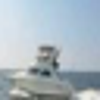

In [8]:
(data, label) = trainset[100]
print(classes[label], trainset[100])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

print(images.shape, labels.shape)

       ship        frog       horse        bird
torch.Size([4, 3, 32, 32]) torch.Size([4])


####   定义网络

拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        print(x.shape)       
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


####  定义损失函数和优化器(loss和optimizer)

In [11]:
from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###   训练网络

所有网络的训练流程都是类似的，不断地执行如下流程：

- 输入数据
- 前向传播+反向传播
- 更新参数


In [ ]:
t.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

实际的label:       cat     ship     ship    plane


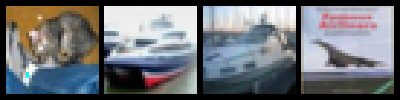

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label: ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))


接着计算网络预测的label：

In [ ]:
# 计算图片在每个类别上的分数
outputs = net(images)
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果:    dog  ship plane plane


已经可以看出效果，准确率50%，但这只是一部分的图片，再来看看在整个测试集上的效果。

In [ ]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 53 %


训练的准确率远比随机猜测(准确率10%)好，证明网络确实学到了东西。

####  在GPU训练
就像之前把Tensor从CPU转到GPU一样，模型也可以类似地从CPU转到GPU。

In [ ]:
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")

net.to(device)
images = images.to(device)
labels = labels.to(device)
output = net(images)
loss= criterion(output,labels)

loss

tensor(0.9488, device='cuda:0', grad_fn=<NllLossBackward>)

如果发现在GPU上并没有比CPU提速很多，实际上是因为网络比较小，GPU没有完全发挥自己的真正实力。

对PyTorch的基础介绍至此结束。总结一下，本节主要包含以下内容。

1. Tensor: 类似Numpy数组的数据结构，与Numpy接口类似，可方便地互相转换。
2. autograd/: 为tensor提供自动求导功能。
3. nn: 专门为神经网络设计的接口，提供了很多有用的功能(神经网络层，损失函数，优化器等)。
4. 神经网络训练: 以CIFAR-10分类为例演示了神经网络的训练流程，包括数据加载、网络搭建、训练及测试。

通过本节的学习，相信读者可以体会出PyTorch具有接口简单、使用灵活等特点。从下一章开始，本书将深入系统地讲解PyTorch的各部分知识。

# AUS rain prediction

In [5]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F
import torch

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 6
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
df = pd.read_csv('./weatherAUS.csv')

In [10]:
features = df.columns.values.tolist()
features.remove('Date')
features.remove('Location')
df = df[features]
df.head()
df['WindDir3pm'].unique()

array([12, 10,  6, 15, 14,  8,  1,  3,  9,  5,  7,  0,  2,  4, 11, 13])

In [6]:
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)
df = df.dropna(how='any')
df.head()
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm',]

In [71]:
# Adhoc test on embedding learning
num_classes = 2
embedding_size = 4

embedding = nn.Embedding(num_classes, embedding_size)

class_vector = torch.tensor([1, 0, 0, 0, 1])

embedded_classes = embedding(class_vector)
embedded_classes.size() # => torch.Size([5, 10])
# print([x for x in embedded_classes])
torch.cat([x for x in embedded_classes], 0)

tensor([-1.1229, -0.1863,  2.2082, -0.6380,  0.3367,  0.1288,  0.2345,  0.2303,
         0.3367,  0.1288,  0.2345,  0.2303,  0.3367,  0.1288,  0.2345,  0.2303,
        -1.1229, -0.1863,  2.2082, -0.6380], grad_fn=<CatBackward0>)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0    0.780888
1.0    0.219112
Name: RainTomorrow, dtype: float64

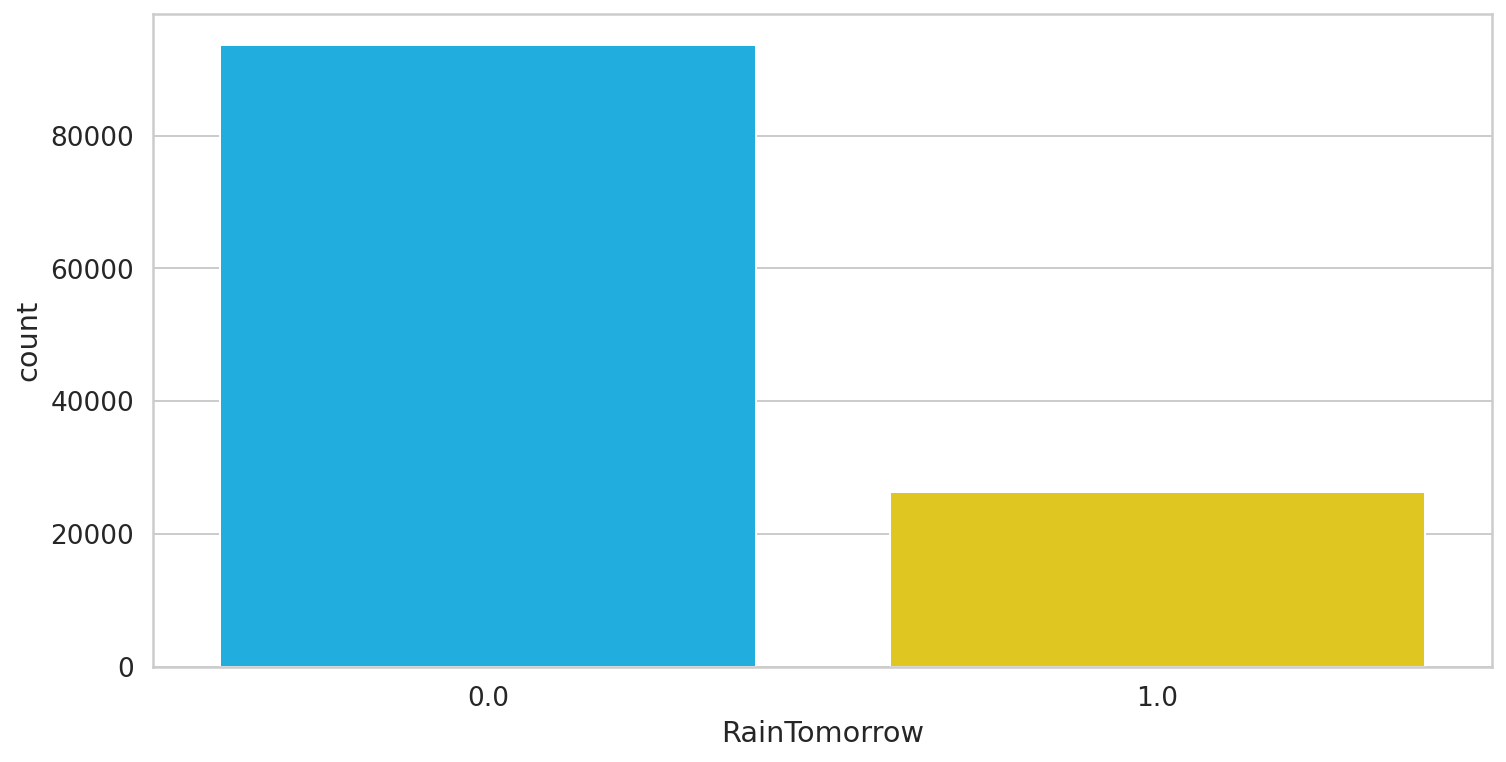

In [35]:
sns.countplot(df.RainTomorrow);
df.RainTomorrow.value_counts() / df.shape[0]

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


class TabularDataset(Dataset):
    def __init__(self, data, cat_cols=None, output_col=None):
        """
        Characterizes a Dataset for PyTorch

        Parameters
        ----------

        data: pandas data frame
        The data frame object for the input data. It must
        contain all the continuous, categorical and the
        output columns to be used.

        cat_cols: List of strings
        The names of the categorical columns in the data.
        These columns will be passed through the embedding
        layers in the model. These columns must be
        label encoded beforehand. 

        output_col: string
        The name of the output variable column in the data
        provided.
        """

        self.n = data.shape[0]

        if output_col:
            self.y = data[output_col].astype(np.float32).values.reshape(-1, 1)
        else:
            self.y = np.zeros((self.n, 1))

        self.cat_cols = cat_cols if cat_cols else []
        self.cont_cols = [
            col for col in data.columns if col not in self.cat_cols + [output_col]
        ]

        if self.cont_cols:
            self.cont_X = data[self.cont_cols].astype(np.float32).values
        else:
            self.cont_X = np.zeros((self.n, 1))

        if self.cat_cols:
            self.cat_X = data[cat_cols].astype(np.int64).values
        else:
            self.cat_X = np.zeros((self.n, 1))

    def __len__(self):
        """
        Denotes the total number of samples.
        """
        return self.n

    def __getitem__(self, idx):
        """
        Generates one sample of data.
        """
        return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]


class FeedForwardNN(nn.Module):
    def __init__(
        self,
        emb_dims,
        no_of_cont,
        lin_layer_sizes,
        output_size,
        emb_dropout,
        lin_layer_dropouts,
    ):

        """
        Parameters
        ----------

        emb_dims: List of two element tuples
        This list will contain a two element tuple for each
        categorical feature. The first element of a tuple will
        denote the number of unique values of the categorical
        feature. The second element will denote the embedding
        dimension to be used for that feature.

        no_of_cont: Integer
        The number of continuous features in the data.

        lin_layer_sizes: List of integers.
        The size of each linear layer. The length will be equal
        to the total number
        of linear layers in the network.

        output_size: Integer
        The size of the final output.

        emb_dropout: Float
        The dropout to be used after the embedding layers.

        lin_layer_dropouts: List of floats
        The dropouts to be used after each linear layer.
        """

        super().__init__()

        # Embedding layers
        self.emb_layers = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims])

        no_of_embs = sum([y for x, y in emb_dims])
        self.no_of_embs = no_of_embs
        self.no_of_cont = no_of_cont

        # Linear Layers
        first_lin_layer = nn.Linear(
            self.no_of_embs + self.no_of_cont, lin_layer_sizes[0]
        )

        self.lin_layers = nn.ModuleList(
            [first_lin_layer]
            + [
                nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
                for i in range(len(lin_layer_sizes) - 1)
            ]
        )

        for lin_layer in self.lin_layers:
            nn.init.kaiming_normal_(lin_layer.weight.data)

        # Output Layer
        self.output_layer = nn.Linear(lin_layer_sizes[-1], output_size)
        nn.init.kaiming_normal_(self.output_layer.weight.data)

        # Batch Norm Layers
        self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
        self.bn_layers = nn.ModuleList(
            [nn.BatchNorm1d(size) for size in lin_layer_sizes]
        )

        # Dropout Layers
        self.emb_dropout_layer = nn.Dropout(emb_dropout)
        self.droput_layers = nn.ModuleList(
            [nn.Dropout(size) for size in lin_layer_dropouts]
        )

    def forward(self, cont_data, cat_data):

        if self.no_of_embs != 0:
            x = [
                emb_layer(cat_data[:, i]) for i, emb_layer in enumerate(self.emb_layers)
            ]
            x = torch.cat(x, 1)
            x = self.emb_dropout_layer(x)

        if self.no_of_cont != 0:
            normalized_cont_data = self.first_bn_layer(cont_data)

            if self.no_of_embs != 0:
                x = torch.cat([x, normalized_cont_data], 1)
            else:
                x = normalized_cont_data

        for lin_layer, dropout_layer, bn_layer in zip(
            self.lin_layers, self.droput_layers, self.bn_layers
        ):

            x = F.relu(lin_layer(x))
            x = bn_layer(x)
            x = dropout_layer(x)

        x = torch.sigmoid(self.output_layer(x))

        return x

In [16]:
output_feature = "RainTomorrow"
label_encoders = {}
for cat_col in categorical_features:
      label_encoders[cat_col] = LabelEncoder()
      df[cat_col] = label_encoders[cat_col].fit_transform(df[cat_col])


# X = df[[feature for feature in features if feature != 'RainTomorrow']]
# y = df[['RainTomorrow']]

df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
# X_train = torch.from_numpy(X_train.to_numpy()).float()
# y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

# X_test = torch.from_numpy(X_test.to_numpy()).float()
# y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [31]:
dataset = TabularDataset(data=df_train, cat_cols=categorical_features,
                             output_col=output_feature)
batchsize = 64
dataloader = DataLoader(dataset, batchsize, shuffle=True, num_workers=1)

In [43]:
cat_dims = [int(df_train[col].nunique()) for col in categorical_features]
print(cat_dims)
emb_dims = [(x, min(10, (x + 1) // 2)) for x in cat_dims]
print(emb_dims)

model = FeedForwardNN(emb_dims, no_of_cont=len(features) - 1 - len(categorical_features), lin_layer_sizes=[50, 50],
                          output_size=1, emb_dropout=0.04,
                          lin_layer_dropouts=[0.001,0.01])

[16, 16, 16]
[(16, 8), (16, 8), (16, 8)]


In [ ]:
no_of_epochs = 10
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(no_of_epochs):
    for i, data in enumerate(dataloader, 0):
        y, cont_x, cat_x = data
        cat_x = cat_x
        cont_x = cont_x
        y = y

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)

        # Backward Pass and Optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
          print("epoch", epoch, loss.item())

In [50]:
dataset_test = TabularDataset(data=df_test, cat_cols=categorical_features,
                             output_col=output_feature)
batchsize = 64
dataloader_test = DataLoader(dataset_test, batchsize, shuffle=True, num_workers=1)
y_pred = torch.Tensor()

for i, data in enumerate(dataloader_test, 0):
        y, cont_x, cat_x = data
        cat_x = cat_x
        cont_x = cont_x

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)
        y_pred = torch.cat([y_pred, preds], 0)

        # Backward Pass and Optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
          print("epoch", epoch, loss.item())

epoch 9 0.5031262636184692


In [52]:
y_pred = y_pred.ge(.5).view(-1)
y_test = df_test['RainTomorrow']
classes = ['No rain', 'Raining']

print(classification_report(y_test, y_pred, 
                            target_names=classes))

              precision    recall  f1-score   support

     No rain       0.78      0.82      0.80      4351
     Raining       0.25      0.21      0.23      1291

    accuracy                           0.68      5642
   macro avg       0.51      0.51      0.51      5642
weighted avg       0.66      0.68      0.67      5642

